### Red neuronal de clasificación binaria

#### Librerias

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

#### Dataset 

(1000, 2) (1000, 1)


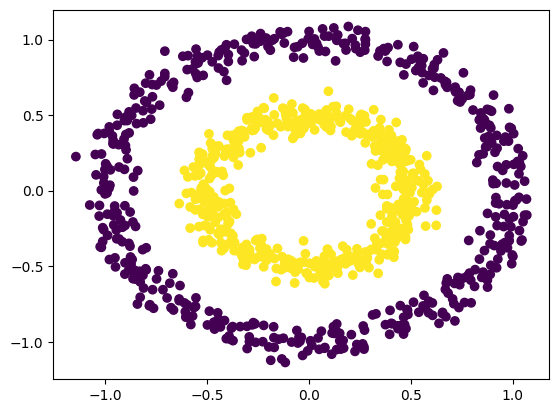

In [409]:
circles = make_circles(n_samples=1000, shuffle=True, random_state=42, noise=0.06, factor=0.5)
x, y = circles
y = y[:, np.newaxis]
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')
plt.show()

x_train = x[:800, :]
x_test = x[800:, :]
y_train = y[:800, :]
y_test = y[800:, :]

#### Funciones de activación

In [410]:
def sig_act(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu_act(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

#### Funciones de perdida

In [411]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

#### Creando la red neuronal

In [412]:
def create(neural_struc, neural_network):
    np.random.seed(42)
    for i in range(0, len(neural_struc) - 1):
        neural_network['W' + str(i+1)] = (np.random.rand(neural_struc[i], neural_struc[i+1]) * 2) - 1
        neural_network['b' + str(i+1)] = (np.random.rand(1, neural_struc[i+1]) * 2) - 1

#### Entrenamiento

In [413]:
def train(x_train, y_train, neural_struc, neural_network, lr, training):

    # Forward

    neural_network['A0'] = x_train

    for i in range(0, len(neural_struc) - 1):

        if i == len(neural_struc) - 1:
            
            neural_network['Z'+str(i+1)] = (neural_network['A'+str(i-1)] @ neural_network['W'+str(i+1)]) + neural_network['b'+str(i+1)]
            neural_network['A'+str(i+1)] = sig_act(neural_network['Z'+str(i+1)])

        else:
            neural_network['Z'+str(i+1)] = (neural_network['A'+str(i)] @ neural_network['W'+str(i+1)]) + neural_network['b'+str(i+1)]
            neural_network['A'+str(i+1)] = relu_act(neural_network['Z'+str(i+1)])

    output = neural_network['A'+str(i+1)]
    

    # Backpropagation

    if training == True:

        for i in range(len(neural_struc) - 1, 0, -1):

            if i == len(neural_struc) - 1:
   
                neural_network['DZ'+str(i)] = mse(y_train, output, True) * sig_act(output, True)
                neural_network['DW'+str(i)] = neural_network['A'+str(abs(i-1))].T @ neural_network['DZ'+str(i)]  

            else:
                neural_network['DZ'+str(i)] = (neural_network['DZ'+str(i+1)] @ neural_network['W'+str(i+1)].T) * relu_act(neural_network['A'+str(i)], True)
                neural_network['DW'+str(i)] = neural_network['A'+str(abs(i-1))].T @ neural_network['DZ'+str(i)]

            # Gradinet Descent:
            
            neural_network['W'+str(i)] = neural_network['W'+str(i)] - neural_network['DW'+str(i)] * lr
            neural_network['b'+str(i)] = neural_network['b'+str(i)] - (np.mean(neural_network['DZ'+str(i)],axis=0, keepdims=True)) * lr
            
    return output

#### Inicialización

In [414]:
neural_struc = [2,8,8,1] # 5 capas F
#2,8,8,1 0.96
neural_network = {}
create(neural_struc, neural_network)

#### Visualización del aprendizaje

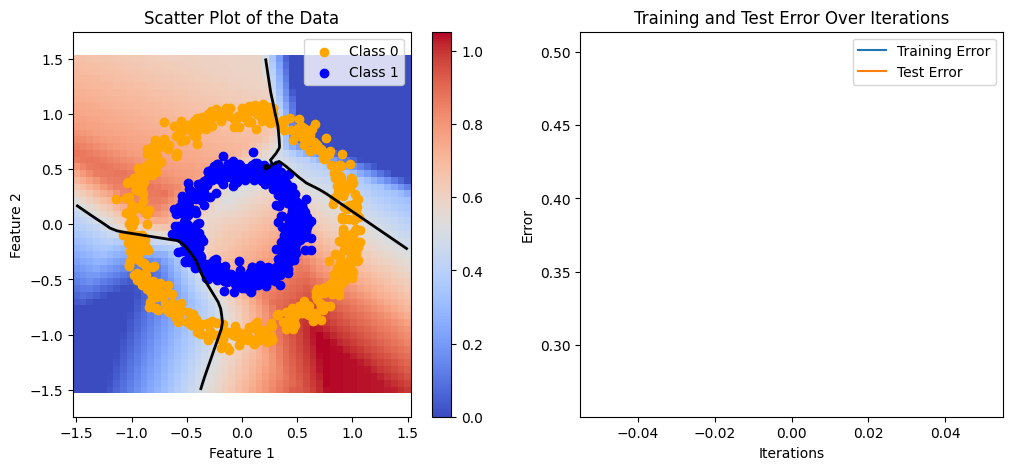

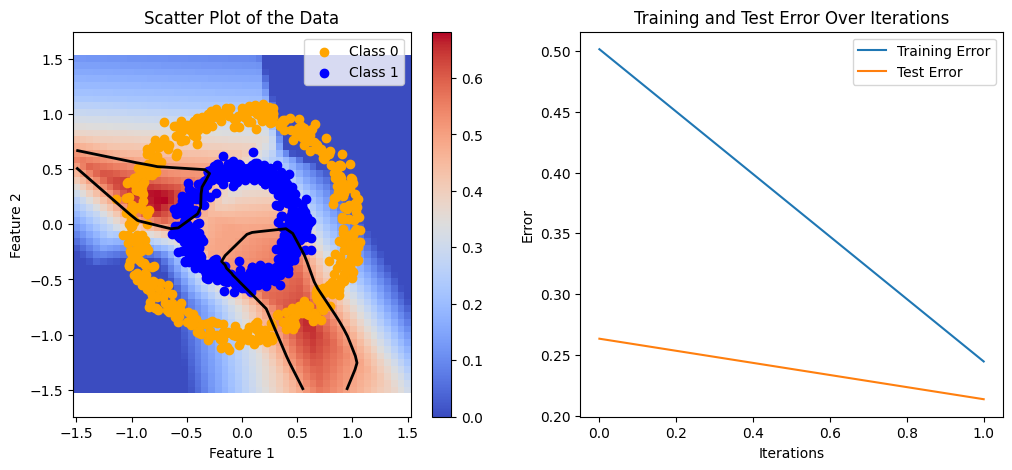

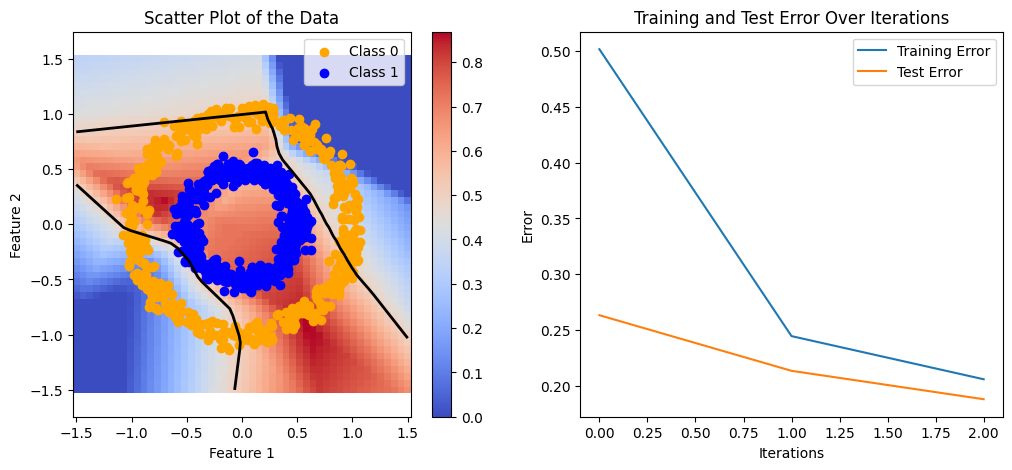

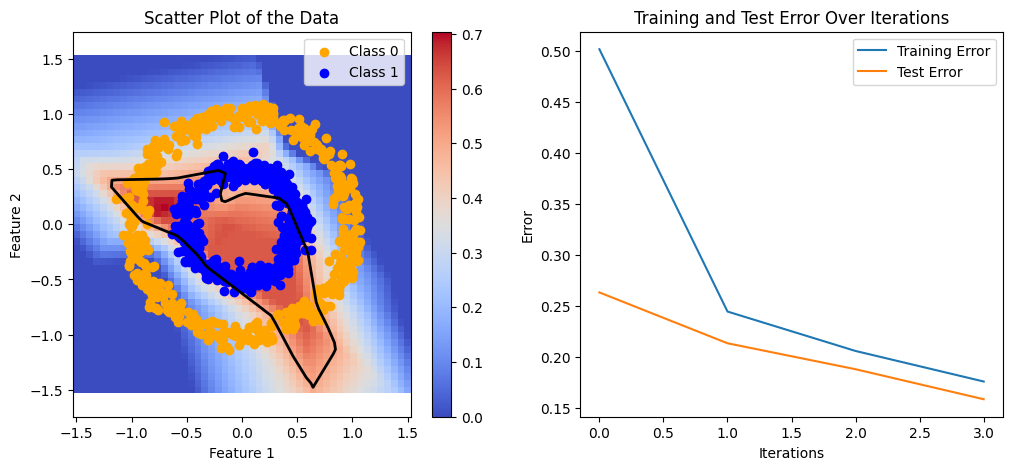

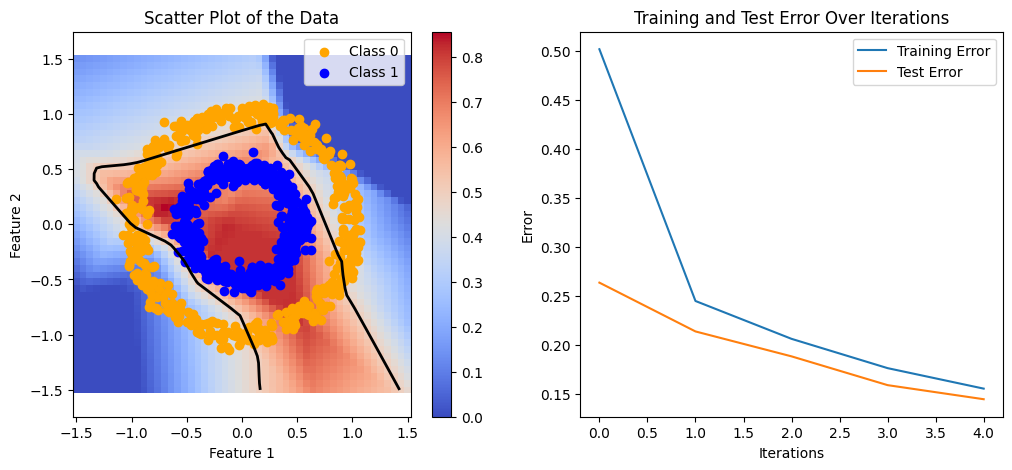

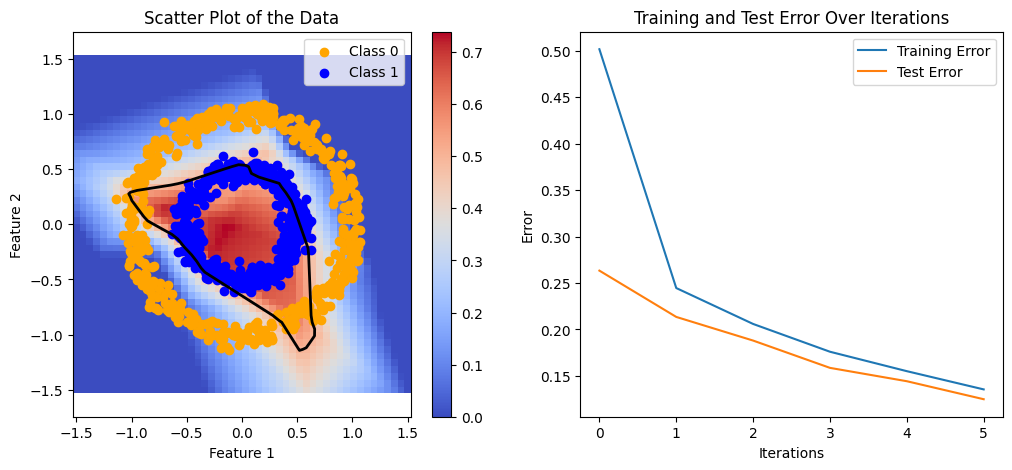

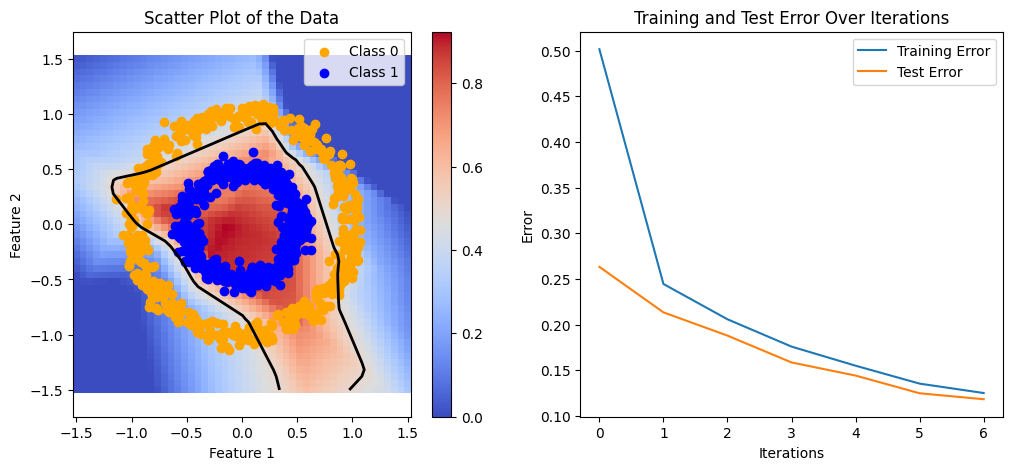

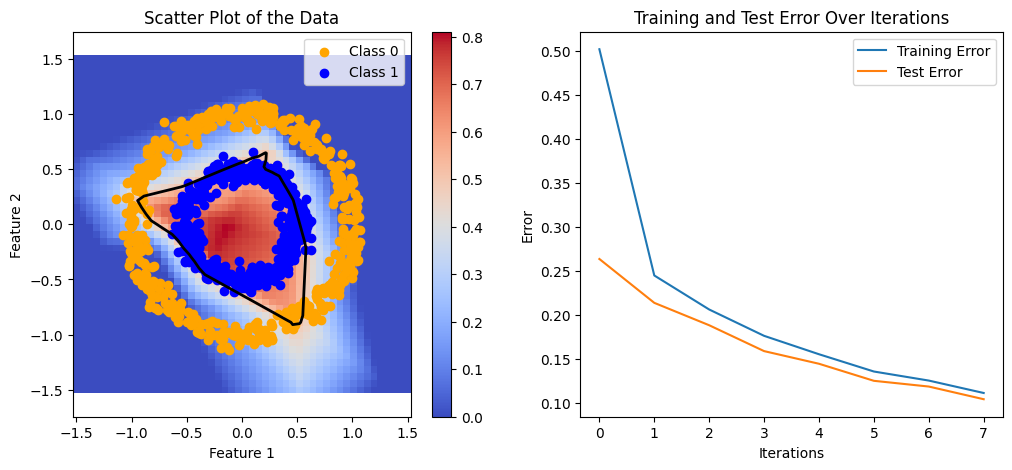

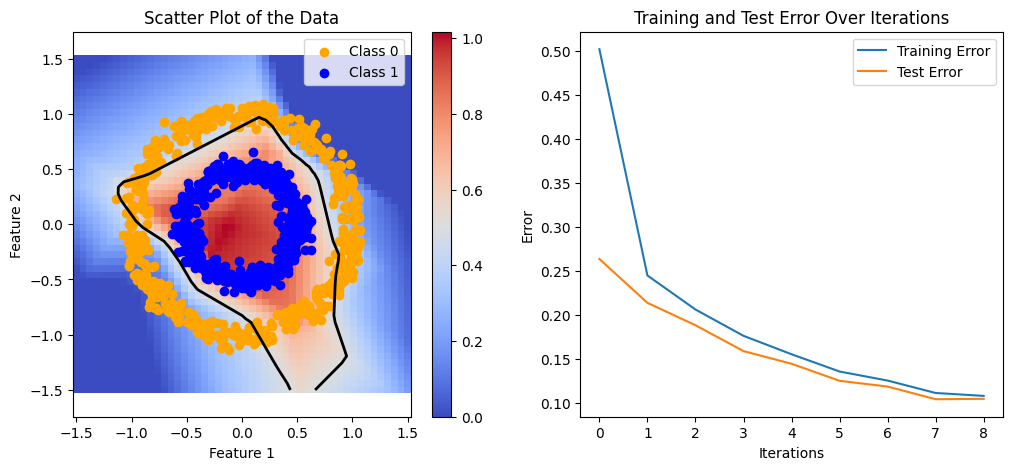

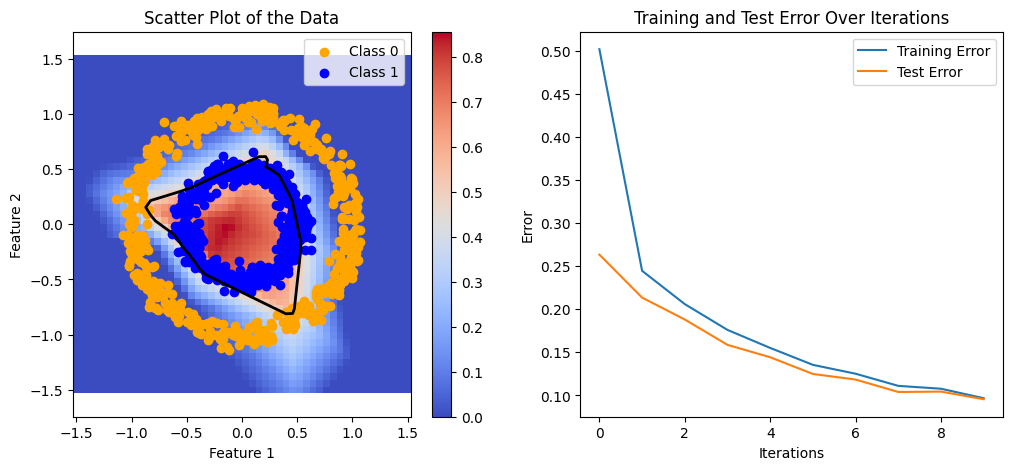

In [415]:
neural_struc = [2,8,8,1] # 5 capas F
#2,8,8,1 0.96
neural_network = {}
create(neural_struc, neural_network)

errors_train = []
errors_test = []

for _ in range(50000):
    if _ % 5000 == 0:
        
        # Evaluation on the test set
        predictions_train = train(x_train, y_train, neural_struc, neural_network, 0.007, True)
        errors_train.append(mse(y_train,predictions_train))

        # Evaluation on the test set
        predictions_test = train(x_test, y_test, neural_struc, neural_network, 0, False)
        errors_test.append(mse(y_test, predictions_test))

        _x0 = np.linspace(-1.5,1.5,50)
        _x1 = np.linspace(-1.5,1.5,50)
        _y = np.zeros((50,50))
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _y[i0,i1] = train(np.array([[x0,x1]]), y_test, neural_struc, neural_network,  0, False)[0][0]

        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # First plot: Scatter plot of the data
        c = ax1.pcolormesh(_x0, _x1, _y, cmap='coolwarm')
        ax1.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="orange", label="Class 0")
        ax1.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="blue", label="Class 1")
        ax1.set_title('Scatter Plot of the Data')
        ax1.set_xlabel('Feature 1')
        ax1.set_ylabel('Feature 2')
        ax1.legend()
        ax1.axis("equal")
        ax1.contour(_x0, _x1, _y, levels=[0.5], colors='black', linewidths=2)
        cbar = plt.colorbar(c, ax=ax1)

        # Second plot: Training error plot

        ax2.plot(errors_train, label='Training Error')
        ax2.plot(errors_test, label='Test Error')
        ax2.set_xlabel('Iterations')
        ax2.set_ylabel('Error')
        ax2.legend()
        ax2.set_title('Training and Test Error Over Iterations')
        plt.pause(2)
        plt.close()
        plt.show()

#### Metricas

In [416]:
for i in range(len(predictions_test)):
    if predictions_test[i] > 0.5:
        predictions_test[i] = 1
    else:
        predictions_test[i] = 0
        
#print(predictions_test, y_test)
accuracy = accuracy_score(y_test, predictions_test)
print(f'Exactitud: {accuracy}')

# Calcular la precisión
precision = precision_score(y_test, predictions_test)
print(f'Precisión: {precision}')

# Calcular el recall
recall = recall_score(y_test, predictions_test)
print(f'Recall: {recall}')

# Calcular el F1 Score
f1 = f1_score(y_test, predictions_test)
print(f'F1 Score: {f1}')

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_test)
print(f'AUC-ROC: {auc_roc}')

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, predictions_test)
print('Matriz de confusión:')
print(conf_mat)
'''
Verdaderos Negativos (TN): Las instancias negativas que fueron correctamente clasificadas como negativas.
Falsos Positivos (FP): Las instancias negativas que fueron incorrectamente clasificadas como positivas.
Falsos Negativos (FN): Las instancias positivas que fueron incorrectamente clasificadas como negativas.
Verdaderos Positivos (TP): Las instancias positivas que fueron correctamente clasificadas como positivas1.
'''

Exactitud: 0.915
Precisión: 0.9880952380952381
Recall: 0.8383838383838383
F1 Score: 0.907103825136612
AUC-ROC: 0.9142414241424142
Matriz de confusión:
[[100   1]
 [ 16  83]]


'\nVerdaderos Negativos (TN): Las instancias negativas que fueron correctamente clasificadas como negativas.\nFalsos Positivos (FP): Las instancias negativas que fueron incorrectamente clasificadas como positivas.\nFalsos Negativos (FN): Las instancias positivas que fueron incorrectamente clasificadas como negativas.\nVerdaderos Positivos (TP): Las instancias positivas que fueron correctamente clasificadas como positivas1.\n'